<a href="https://colab.research.google.com/github/LeeSeungwon89/Machine-learning_Theory/blob/master/CHAPTER5%20%EB%AA%A8%EB%8D%B8%20%ED%8F%89%EA%B0%80%EC%99%80%20%EC%84%B1%EB%8A%A5%20%ED%96%A5%EC%83%81.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 들어가며

지도 학습 모델을 평가하고자 `train_test_split` 함수를 사용해서 두 세트로 나눴습니다. 그리고 모델을 만들기 위해 훈련 세트에 `fit` 메서드를 적용했습니다. 모델을 평가하기 위해 테스트 세트에 `score` 메서드를 사용했습니다. 분류 문제의 경우에 `score` 메서드는 정확하게 분류된 샘플의 비율을 계산합니다.

In [1]:
pip install mglearn

     |████████████████████████████████| 540 kB 4.0 MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582637 sha256=d1d627478a99db9a4a19b64b2c4d8f3e2fbaf427f68523d6a1a52cc71fb0e78d
  Stored in directory: /root/.cache/pip/wheels/f1/17/e1/1720d6dcd70187b6b6c3750cb3508798f2b1d57c9d3214b08b
Successfully built mglearn


In [2]:
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
%matplotlib inline

In [3]:
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X, y = make_blobs(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
logreg = LogisticRegression().fit(X_train, y_train)
print('테스트 세트 점수: {:.2f}'.format(logreg.score(X_test, y_test)))

테스트 세트 점수: 0.88


익숙한 코드 형식입니다. 새로운 데이터에 모델이 얼마나 잘 일반화되는지 측정할 목적으로 데이터를 훈련 세트와 테스트 세트로 나눕니다. 모델이 훈련 세트에 잘 맞는 것보다 학습 과정에 없던 데이터에 대해 예측을 얼마나 잘 하느냐가 중요합니다. 무엇보다도 과대적합과 과소적합을 방지하면서 균형점을 지진 최적의 모델을 형성해야 합니다.

이번 챕터에서는 두 가지 관점에서 이 평가 방법을 확장합니다. 먼저 안정적인 일반화 성능 측정 방법인 **교차 검증**에 대해 설명합니다. `score` 메서도가 제공하는 정확도와 $R^2$ 값 이외에 분류와 회귀 성능을 측정하는 다른 방법도 설명합니다. 아울러 최적의 일반화 성능을 얻을 목적으로 매개변수를 조정하는 데 유용한 **그리드 서치**에 대해서도 설명합니다.

# 5.1 교차 검증

**교차 검증(cross-validation)**은 훈련 세트와 테스트 세트로 한 번 나눈 것보다 더 안정적이고 뛰어난 통계적 방법입니다. 교차 검증에서는 데이터를 여러 번 반복해서 나누고 여러 모델을 학습합니다. 

많이 사용되는 방법 중에 하나는 **k-겹 교차 검증(k-fold cross-validation)**입니다. k는 특정 숫자이며, 일반적으로 5나 10입니다. 5-겹 교차 검증을 하려면 데이터를 먼저 **폴드(fold)**라고 하는 거의 비슷한 크기의 부분 집합 다섯 개로 나눕니다. 그리고나서 일련의 모델을 생성합니다.

첫 번째 모델은 첫 번째 폴드를 테스트 세트로 사용하고, 나머지 폴드를 훈련 세트로 사용해서 학습합니다. 즉 폴드 2~5까지의 데이터로 모델을 만들고, 폴드 1을 사용해서 정확도를 평가합니다. 

두 번째 모델은 두 번째 폴드를 테스트 세트로 사용하고, 나머지 폴드를 훈련 세트로 사용해서 학습합니다. 즉 폴드 1과 3~5까지의 데이터로 모델을 만들고, 폴드 2를 사용해서 정확도를 평가합니다.

이 방식으로 5까지 반복합니다. 분할을 다섯 번만큼 시도하면서 정확도를 측정하면 정확도 다섯 개를 얻습니다.

위 설명을 그림으로 나타냅니다.

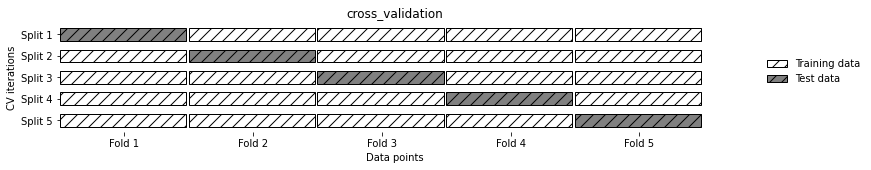

In [4]:
mglearn.plots.plot_cross_validation()

## 5.1.1 scikit-learn의 교차 검증

교차 검증은 `model_selection` 모듈의 `cross_val_score` 함수로 구현되어 있습니다. `cross_val_score` 함수가 가진 매개변수는 평가하려는 모델과 훈련 데이터, 타깃 레이블입니다.

iris 데이터셋에 적용한 `LogisticRegression`을 평가합니다.

In [5]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

iris = load_iris()
logreg = LogisticRegression(max_iter=1000)
scores = cross_val_score(logreg, iris.data, iris.target)
print('5-겹 교차 검증 점수:', scores)

5-겹 교차 검증 점수: [0.96666667 1.         0.93333333 0.96666667 1.        ]


5-겹(기본값) 교차 검증을 수행했으므로 점수 5개가 반환됐습니다.

폴드 수는 `cv` 매개변수로 지정할 수 있습니다. 10-겹 교차 검증을 수행합니다.

In [6]:
scores = cross_val_score(logreg, iris.data, iris.target, cv=10)
print('10-겹 교차 검증 점수:', scores)

10-겹 교차 검증 점수: [1.         0.93333333 1.         1.         0.93333333 0.93333333
 0.93333333 1.         1.         1.        ]


최소한 5-겹 교차 검증 정도를 사용하는 편이 좋습니다. 일반적으로 교차 검증의 정확도를 간단하게 나타내려면 평균을 이용합니다.

In [7]:
print('10- 겹 교차 검증 평균 점수: {:.2f}'.format(scores.mean()))

10- 겹 교차 검증 평균 점수: 0.97


모델 정확도를 97%로 판단할 수 있습니다. 10-겹 교차 검증이 만든 값 열 개를 보면 93~100%까지 각각 다른 값을 가집니다. 이는 모델이 훈련에 사용한 폴드에 매우 의존적이거나 데이터셋이 작기 때문입니다. 

교차 검증에 `cross_validate` 함수도 사용할 수 있습니다. 이 함수는 분할마다 훈련과 테스트에 걸린 시간을 담은 딕셔너리를 반환합니다. 훈련 점수와 테스트 점수 모두 반환하도록 매개변수를 지정할 수도 있습니다. 기실 `cross_validate_score` 함수는 `cross_validate` 함수를 사용해서 `test_score` 키만 반환하는 것입니다.

In [8]:
from sklearn.model_selection import cross_validate

res = cross_validate(logreg, iris.data, iris.target, cv=5, return_train_score=True)
display(res)

{'fit_time': array([0.05305552, 0.07517457, 0.05347729, 0.03491902, 0.03060102]),
 'score_time': array([0.00072432, 0.00060749, 0.00059986, 0.00045133, 0.00043821]),
 'test_score': array([0.96666667, 1.        , 0.93333333, 0.96666667, 1.        ]),
 'train_score': array([0.96666667, 0.96666667, 0.98333333, 0.98333333, 0.975     ])}

판다스를 사용해서 결괏값을 출력하고 평균을 계산합니다.

In [9]:
res_df = pd.DataFrame(res)
display(res_df)
print('평균 시간과 점수:\n', res_df.mean())

,fit_time,score_time,test_score,train_score
0,0.053056,0.000724,0.966667,0.966667
1,0.075175,0.000607,1.000000,0.966667
2,0.053477,0.000600,0.933333,0.983333
3,0.034919,0.000451,0.966667,0.983333
4,0.030601,0.000438,1.000000,0.975000


평균 시간과 점수:
 fit_time       0.049445
score_time     0.000564
test_score     0.973333
train_score    0.975000
dtype: float64


### NOTE

교차 검증은 새로운 데이터에 적용할 모델을 만드는 방법이 아닙니다. 교차 검증 함수는 결코 모델을 반환하지 않습니다. `cross_val_score` 함수를 호출하면 내부적으로 여러 모델이 만들어질 뿐입니다. 교차 검증의 목적은 주어진 데이터셋에 학습된 알고리즘이 얼마나 잘 일반화될지 가늠하는 것입니다.

교차 검증으로 모델을 만들 수는 없지만 `cross_val_predict` 함수를 사용해서 예측값을 구할 수 있습니다. `cross_val_predict(logreg, iris.data, iris.target, cv=5)` 형식을 취하면 각 폴드가 테스트 세트일 때 예측된 값을 반환합니다.

## 5.1.2 교차 검증의 장점과 단점

교차 검증에는 몇 가지 장점이 있습니다.

먼저 `train_test_split` 함수로 데이터를 나눌 때, 훈련 세트에 분류하기 어려운 샘플만 담기게 되었다고 가정하겠습니다. 이 경우에 테스트 세트에는 분류하기 쉬운 샘플만 들어 있어서 테스트 세트에 대한 정확도는 비정상적으로 높게 나올 것입니다. 반대로 분류하기 어려운 샘플들이 모두 테스트 세트에 들어간다면 정확도는 매우 낮게 나올 것입니다.

그러나 교차 검증을 사용하면 테스트 세트에 각 샘플이 정확하게 한 번씩 들어갑니다. 각 샘플은 폴드 중 하나에 속하며, 각 폴드는 한 번씩 테스트 세트가 됩니다. 따라서 교차 검증의 점수와 평균값을 높이기 위해서는 데이터셋에 있는 모든 샘플에 대해 모델이 잘 일반화되어야 합니다.

또 데이터를 여러 개로 나누면 모델이 훈련 데이터에 얼마나 민감한지 확인할 수 있습니다. iris 데이터셋에서 얻은 90~100% 정확도 범위는 꽤 넓으며, 새로운 데이터를 적용했을 때 최악의 경우와 최선의 경우를 짐작할 수 있습니다.

아울러 교차 검증은 분할을 한 번 했을 경우보다 데이터를 효과적으로 사용할 수 있다는 것입니다. `train_test_split` 함수를 사용하면 일반적으로 데이터 중에 75%를 학습에 사용하고, 25%를 평가에 사용합니다. 예컨대 5-겹 교차 검증의 경우는 매 반복에서 4/5(80%)의 데이터를 학습에 사용합니다. 10겹 교차 검증의 경우는 매 반복에서 9/10(90%)의 데이터를 학습에 사용합니다. 많은 데이터는 더 좋은 모델을 만듭니다.

다만 교차 검증에는 단점이 한 가지 존재합니다.

모델을 k개만큼 생성하므로 연산 비용이 크게 늘어납니다. k배만큼 느려진다고 볼 수 있습니다.

## 5.1.3 계층별 k-겹 교차 검증과 그외 전략들

데이터셋을 나열 순서대로 k개의 폴드로 나누는 것은 항상 좋지만은 않습니다. iris 데이터셋으로 예를 듭니다.

In [10]:
from sklearn.datasets import load_iris
iris = load_iris()
print('Iris 레이블:\n', iris.target)

Iris 레이블:
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


첫 번째부터 1/3까지는 클래스 0입니다. 각 1/3씩 클래스 1, 클래스 2로 나뉘어 있습니다.

이 데이터에 3-겹 교차 검증을 적용한다고 가정하겠습니다. 첫 번째 폴드는 클래스 0만을 가졌으므로 첫 번째 반복에서 테스트 세트는 클래스 0만 가지고, 훈련 세트는 클래스 1과 2만 가집니다. 세 번을 반복하면 훈련 세트와 테스트 세트의 클래스가 다르므로 정확도가 0이 됩니다. 결국 이 방법은 완전히 잘못됐습니다.

따라서 일반화 성능을 측정할 때 단순한 k-겹 교차 검증이 아닌 **계층별 k-겹 교차 검증(stratidied k-fold cross validation)**을 사용하는 것이 현명합니다. 이 방법은 폴드 안의 클래스 비율이 전체 데이터셋의 클래스 비율과 같도록 데이터를 나눕니다. 

참고로 `cross_val_score` 함수에서 폴드를 나눌 때, 분류에는 `StratifiedKFold`를 사용해서 훈련 세트와 테스트 세트를 나누고, 회귀에는 일반적인 `KFold`를 사용합니다. `KFold`를 사용할 때 `shuffle` 매개변수에 `True` 값을 지정하면 폴드를 나누기 전에 무작위로 섞을 수 있으나, 이 매개변수를 직접 지정할 방법은 없습니다. 'KFold' 객체를 생성해서 `cross_val_score` 함수의 `cv` 매개변수를 지정하고 객체에 전달해야 합니다.

계층별 k-겹 교차 검증에 대한 설명을 그림으로 나타냅니다.

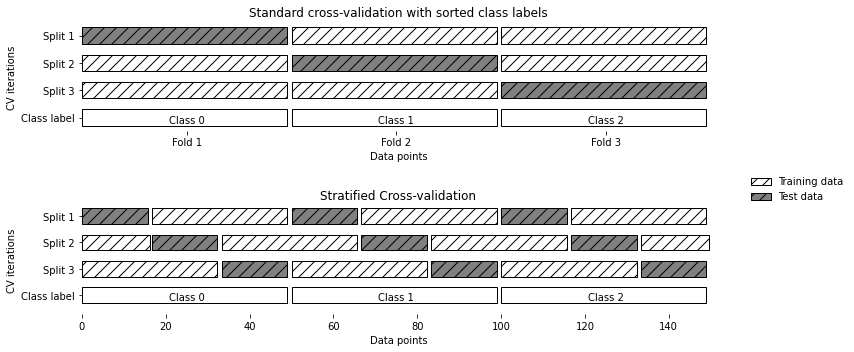

In [11]:
mglearn.plots.plot_stratified_cross_validation()

예를 들어 샘플의 90%가 클래스 A, 10%가 클래스 B라면 계층별 교차 검증은 각 폴드에 클래스 A에 속하는 샘플이 90%, 클래스 B에 속하는 샘플이 10%가 되도록 배치합니다.

### 교차 검증 상세 옵션

위에서 `cross_val_score` 함수에 `cv` 매개변수로 값을 전달해서 폴드 개수를 지정했습니다. 이 방법 말고 더 세밀하게 데이터를 분할하는 방법을 사용할 수 있습니다. `cv` 매개변수에 **교차 검증 분할기(cross-validation splitter)**를 전달하는 것입니다.

분류에서는 계층별 k-겹 교차 검증, 회귀에서는 기본 k-겹 교차 검증의 기본값이 잘 작동합니다. 하지만 다른 전략이 필요한 경우가 있습니다. 예컨대 다른 사람의 결과를 재현하기 위해 분류 데이터셋에 기본 k-겹 교차 검증을 사용해야 할 경우입니다. 이 경우에는 `KFold` 분할기를 임포트 해서 원하는 폴드 수를 넣고 객체를 생성해야 합니다.

In [12]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=5)

'kfold' 객체를 `cv` 매개변수에 값으로 지정합니다.

In [13]:
print('교차 검증 점수:\n', cross_val_score(logreg, iris.data, iris.target, cv=kfold))

교차 검증 점수:
 [1.         1.         0.86666667 0.93333333 0.83333333]


iris 데이터셋에 기본 3-겹 교차 검증을 사용하여 방법에 대한 타당성을 확인합니다.

In [14]:
kfold = KFold(n_splits=3)
print('교차 검증 점수:\n', cross_val_score(logreg, iris.data, iris.target, cv=kfold))

교차 검증 점수:
 [0. 0. 0.]


각 폴드는 iris 데이터셋의 클래스 중 하나에 대응하므로 아무것도 학습할 수 없습니다. 계층별 폴드를 만드는 대신 이 문제를 해결하는 다른 방법은 데이터를 섞어서 샘플 순서를 뒤죽박죽으로 만드는 것입니다. 데이터를 분할하기 전에 섞어주면 결과가 더 좋습니다.

데이터를 섞기 위해 `KFold` 클래스의 `shuffle` 매개변수를 `True`로 지정합니다. 아울러 `random_state` 매개변수에 지정할 값을 고정하여 폴드가 매번 바뀌는 것을 방지해야 합니다.

In [15]:
kfold = KFold(n_splits=3, shuffle=True, random_state=0)
print('교차 검증 점수:\n', cross_val_score(logreg, iris.data, iris.target, cv=kfold))

교차 검증 점수:
 [0.98 0.96 0.96]


### LOOCV

**LOOCV(Leave-one-out cross-validation)**도 자주 사용하는 교차 검증 방법입니다. 이는 폴드 하나에 샘플 하나만 들어 있는 k-겹 교차 검증입니다. 각 반복에서 샘플 하나를 선택해서 테스트 세트로 사용합니다. 데이터셋이 클 경우에는 시간이 매우 오래 걸리지만, 작은 데이터셋에서는 더 좋은 결과를 도출하기도 합니다.

In [16]:
from sklearn.model_selection import LeaveOneOut
loo = LeaveOneOut()
scores = cross_val_score(logreg, iris.data, iris.target, cv=loo)
print('교차 검증 분할 횟수:', len(scores))
print('평균 정확도: {:.2f}'.format(scores.mean()))

교차 검증 분할 횟수: 150
평균 정확도: 0.97


### 임의 분할 교차 검증

**임의 분할 교차 검증(shuffle-split cross-validation)**은 매우 유연한 교차 검증 방법입니다. 매개변수인 `train_size`에 지정한 값만큼 훈련 세트를 만들고, 또 다른 매개변수인 `test_size`에 지정한 값만큼 훈련 세트와 중첩되지 않은 샘플로 테스트 세트를 만들도록 분할합니다. `n_splits` 매개변수에 반복 횟수를 지정합니다.

샘플이 10개인 데이터셋을 샘플 5개로 이루어진 훈련 세트, 샘플 2개로 이루어진 테스트 세트로 4번만큼 반복하는 임의 분할 교차 검증을 시각화합니다. 참고로 `train_size`와 `test_size`에 정수를 입력하면 샘플의 절대 개수, 실수를 입력하면 전체 데이터의 비율이 지정됩니다.

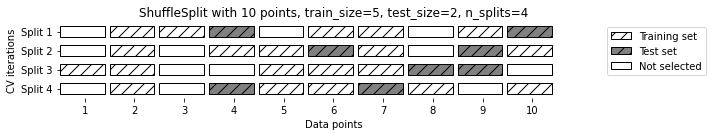

In [17]:
mglearn.plots.plot_shuffle_split()

데이터셋의 50%씩 훈련 세트와 테스트 세트로 10번만큼 반복 분할합니다.

In [18]:
from sklearn.model_selection import ShuffleSplit
# `random_state` 매개변수에 값을 지정하지 않으면 셀을 실행할 때마다
# 매번 다른 결과가 출력됩니다. 샘플 하나가 매번 다른 세트에 포함되는 것입니다.
shuffle_split = ShuffleSplit(train_size=.5, test_size=.5, n_splits=10)
scores = cross_val_score(logreg, iris.data, iris.target, cv=shuffle_split)
print('교차 검증 점수:\n', scores)

교차 검증 점수:
 [0.98666667 0.94666667 0.93333333 0.94666667 0.93333333 0.97333333
 0.94666667 0.97333333 0.96       0.92      ]


임의 분할 교차 검증은 반복 횟수를 훈련 세트나 테스트 세트의 크기와 독립적으로 조절해야 할 경우에 유용하게 사용됩니다. `train_size`와 `test_size`의 합을 전체와 다르게 해서 전체 데이터의 일부만 사용할 수도 있습니다. 이런 방식으로 데이터를 **부분 샘플링(subsampling)**하는 방식은 대규모 데이터셋으로 작업할 때 도움이 됩니다. 추가로 `StratifiedShuffleSplit` 클래스는 `ShuffleSplit` 클래스의 계층별 버전이며, 분류 작업에 적합합니다.

### 그룹별 교차 검증

데이터에 연관성을 가진 그룹이 있을 경우에도 교차 검증을 많이 사용합니다.

얼굴 사진에서 표정을 인식하는 시스템을 생성하고자 사람 100명을 나타낸 사진을 모았다고 가정하겠습니다. 한 사람을 나타낸 사진은 여러 장이고 사진마다 다른 표정을 담고 있습니다. 문제의 목표는 이 데이터셋에 들어있지 않은 사람이 짓는 표정을 정확하게 구분하는 분류기를 생성하는 것입니다.

이 분류기가 내는 성능을 측정하기 위해 계층별 교차 검증을 시도할 수 있습니다. 그러나 같은 사람의 사진이 훈련 세트와 테스트 세트 모두에 나타날 수 있습니다. 완전히 새로운 얼굴보다 훈련 세트에 있던 얼굴의 표정은 훨씬 쉽게 식별할 것입니다. 새 얼굴에 대한 일반화 성능을 더 정확하게 평가하려면 훈련 세트와 테스트 세트에 서로 다른 사람의 사진이 들어가도록 해야 합니다.

이를 도모하려면 사진 속의 사람이 누구인지 기록한 배열을 `groups` 매개변수로 전달받을 수 있는 `GroupKFold` 매개변수를 사용할 수 있습니다. 'groups' 객체(배열)는 훈련 세트와 테스트 세트를 만들 때 분리되지 않아야 할 그룹을 지정하는 것입니다. 클래스 레이블과 혼동하지 않아야 합니다.

데이터에 그룹이 있는 예로는 의료 애플리케이션을 들 수 있습니다. 목적은 같은 환자 데이터에서 얻은 여러 샘플을 가지고 새로운 환자에게 일반화하는 것입니다.

음성 인식의 경우에도 데이터셋에 같은 사람의 목소리가 여러 개 녹음되어 있을 수 있으며, 문제의 목적은 새로운 사람의 대화를 인식하는 것입니다.

인위적으로 생성한 데이터셋에 'groups' 배열로 그룹을 지정합니다. 샘플 12개로 구성되었고, 'groups'는 각 샘플에 대해 각 샘플이 어떤 그룹에 속하는지 나타냅니다. 그룹 4개를 나타내며, 처음 샘플 3개는 첫 번째 그룹, 다음 샘플 4개는 두 번째 그룹을 나타내는 식입니다.

In [19]:
from sklearn.model_selection import GroupKFold

X, y = make_blobs(n_samples=12, random_state=0)
# 처음 샘플 3개는 같은 그룹에 속하고
# 다음 샘플 4개는 같은 그룹에 속하는 식입니다.
# 값은 정렬하지 않아도 괜찮습니다.
groups = [0, 0, 0, 1, 1, 1, 1, 2, 2, 3, 3, 3]
scores = cross_val_score(logreg, X, y, groups=groups, cv=GroupKFold(n_splits=3))
print('교차 검증 점수:\n', scores)

교차 검증 점수:
 [0.75       0.6        0.66666667]


분할을 그룹 레이블을 기반으로 계산합니다.

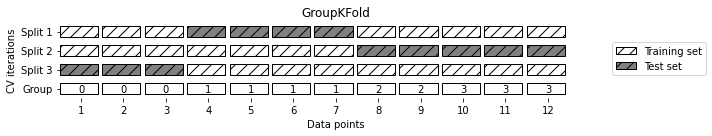

In [20]:
mglearn.plots.plot_group_kfold()

각 분할에서 한 그룹 전체가 훈련 세트 또는 테스트 세트에 위치합니다.

위에서 설명한 `KFold`, `StratifiedKFold`, `GroupKFold` 교차 검증 방법을 많이 사용합니다. 다른 교차 검증 전략에 대한 추가 정보는 [링크](https://scikit-learn.org/stable/modules/cross_validation.html)를 참고하시기 바랍니다.

## 5.1.4 반복 교차 검증

데이터셋의 크기가 

# 5.2 그리드 서치

## 5.2.1 간단한 그리드 서치

## 5.2.2 매개변수 과대적합과 검증 세트

## 5.2.3 교차 검증을 사용한 그리드 서치

### 교차 검증 결과 분석

### 비대칭 매개변수 그리드 탐색

### 그리드 서치에 다양한 교차 검증 적용

### 중첩 교차 검증

### 교차 검증과 그리드 서치 병렬화

# 5.3 평가 지표와 측정

## 5.3.1 최종 목표를 기억하라

## 5.3.2 이진 분류의 평가 지표

### 에러의 종류

### 불균형 데이터셋

### 오차 행렬

#### 정확도와의 관계

#### 정밀도, 재현율, f-점수

### 불확실성 고려

### 정밀도-재현율 곡선과 ROC 곡선

### ROC와 AUC

## 5.3.3 다중 분류의 평가 지표

## 5.3.4 회귀의 평가 지표

## 5.3.5 모델 선택에서 평가 지표 사용하기

# 5.4 요약 및 정리